In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score

In [4]:
path= './data/bus_stop_times_feature_added_all.csv'
df = pd.read_csv(path)

def condition(x):
    if x == 0:
        return 0
    else:
        return 1

df['dwell/pass'] = df['dwell_time_in_seconds'].apply(condition)

In [5]:
df = df[['deviceid',
         'bus_stop',
         'week_no',
         'day_of_week',
         'time_of_day',
         'dt(w-1)',
         'dt(w-2)',
         'dt(w-3)',
         'dt(t-1)',
         'dt(t-2)',
         'dt(n-1)',
         'dt(n-2)',
         'dwell/pass']]
df

,deviceid,bus_stop,week_no,day_of_week,time_of_day,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dwell/pass
0,262,101,1,4,6,87.0,87.0,87.0,87.0,87.0,87.0,87.0,1
1,262,102,1,4,6,37.0,37.0,37.0,37.0,37.0,74.0,37.0,0
2,262,103,1,4,6,29.0,29.0,29.0,29.0,29.0,0.0,74.0,1
3,262,104,1,4,6,1.0,1.0,1.0,1.0,1.0,6.0,0.0,0
4,262,105,1,4,6,224.0,224.0,224.0,224.0,224.0,0.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62596,121,112,23,0,18,0.0,0.0,0.0,28.0,14.0,0.0,16.0,0
62597,121,113,23,0,18,26.0,16.0,75.0,83.0,121.0,0.0,0.0,1
62598,121,114,23,0,18,22.0,12.0,0.0,34.0,24.0,10.0,0.0,0
62599,116,101,23,0,18,68.0,56.0,39.0,57.0,79.0,68.0,68.0,1


<AxesSubplot:xlabel='dwell/pass', ylabel='count'>

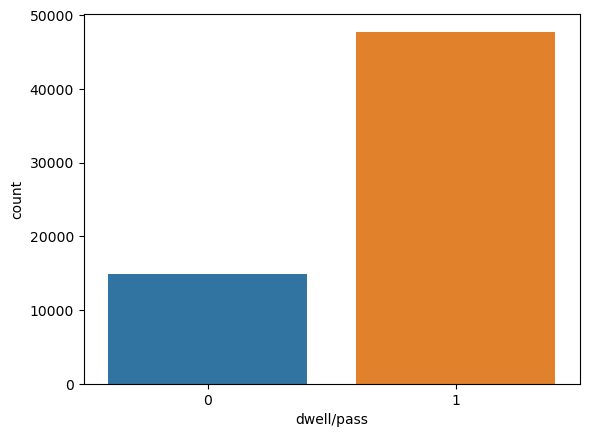

In [60]:
sns.countplot(x="dwell/pass", data=df)

In [6]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'eta': 0.1,
    'seed': 42,
}

In [7]:
def predict(model, dt, t):
    preds = model.predict(dt)

    preds_binary = [1 if p > 0.5 else 0 for p in preds]

    accuracy = accuracy_score(t[['dwell/pass']], preds_binary)
    f1 = f1_score(t[['dwell/pass']], preds_binary)

    print(f"accuracy_score: {accuracy}")
    print(f"f1_score: {f1}")

### 1

In [8]:
train1 = df[df['week_no'] <= 19]
test1 = df[df['week_no'] > 19]

dtrain1 = xgb.DMatrix(train1.drop(columns=['dwell/pass', 'week_no']), label=train1[['dwell/pass']])
dtest1 = xgb.DMatrix(test1.drop(columns=['dwell/pass', 'week_no']), label=test1[['dwell/pass']])

In [9]:
model1 = xgb.train(params, dtrain1, num_boost_round=10)

In [10]:
predict(model1, dtrain1, train1)

accuracy_score: 0.8053123006437395
f1_score: 0.8853470554081899


In [11]:
predict(model1, dtest1, test1)

accuracy_score: 0.7928623988226637
f1_score: 0.8767108288623672


### 2

In [12]:
train2 = df[df['week_no'] == 20]
test2 = df[df['week_no'] > 20]

dtrain2 = xgb.DMatrix(train2.drop(columns=['dwell/pass', 'week_no']), label=train2[['dwell/pass']])
dtest2 = xgb.DMatrix(test2.drop(columns=['dwell/pass', 'week_no']), label=test2[['dwell/pass']])

In [13]:
model2 = xgb.train(params, dtrain2, num_boost_round=10, xgb_model=model1)

In [14]:
predict(model2, dtrain1, train1)

accuracy_score: 0.8183417425428676
f1_score: 0.8895185468226442


In [15]:
predict(model1, dtest2, test2)

accuracy_score: 0.7972275074748573
f1_score: 0.8796385930945466


In [16]:
predict(model2, dtest2, test2)

accuracy_score: 0.8098668116335961
f1_score: 0.8825652648367329


### 3

In [17]:
train3 = df[df['week_no'] == 21]
test3 = df[df['week_no'] > 21]

dtrain3 = xgb.DMatrix(train3.drop(columns=['dwell/pass', 'week_no']), label=train3[['dwell/pass']])
dtest3 = xgb.DMatrix(test3.drop(columns=['dwell/pass', 'week_no']), label=test3[['dwell/pass']])

In [18]:
model3 = xgb.train(params, dtrain3, num_boost_round=10, xgb_model=model2)

In [19]:
predict(model3, dtrain1, train1)

accuracy_score: 0.8146107599219007
f1_score: 0.8853693521396127


In [20]:
predict(model1, dtest3, test3)

accuracy_score: 0.7929992445227902
f1_score: 0.8770933014354066


In [21]:
predict(model2, dtest3, test3)

accuracy_score: 0.8071014857718459
f1_score: 0.8802001876759462


In [22]:
predict(model3, dtest3, test3)

accuracy_score: 0.8111306975572904
f1_score: 0.8798846893017296


### 4

In [23]:
train4 = df[df['week_no'] == 22]
test4 = df[df['week_no'] > 22]

dtrain4 = xgb.DMatrix(train4.drop(columns=['dwell/pass', 'week_no']), label=train4[['dwell/pass']])
dtest4 = xgb.DMatrix(test4.drop(columns=['dwell/pass', 'week_no']), label=test4[['dwell/pass']])

In [24]:
model4 = xgb.train(params, dtrain4, num_boost_round=10, xgb_model=model3)

In [25]:
predict(model4, dtrain1, train1)

accuracy_score: 0.8097198863306849
f1_score: 0.8817330914246578


In [26]:
predict(model1, dtest4, test4)

accuracy_score: 0.8285077951002228
f1_score: 0.9021601016518425


In [27]:
predict(model2, dtest4, test4)

accuracy_score: 0.844097995545657
f1_score: 0.9088541666666667


In [28]:
predict(model3, dtest4, test4)

accuracy_score: 0.8552338530066815
f1_score: 0.9143610013175231


In [29]:
predict(model4, dtest4, test4)

accuracy_score: 0.8530066815144766
f1_score: 0.9133858267716535


<hr>

In [30]:
batch1 = df[df['week_no'] <= 19]
dbatch1 = xgb.DMatrix(batch1.drop(columns=['dwell/pass', 'week_no']), label=batch1[['dwell/pass']])

In [31]:
batch2 = df[df['week_no'] == 20]
dbatch2 = xgb.DMatrix(batch2.drop(columns=['dwell/pass', 'week_no']), label=batch2[['dwell/pass']])

In [32]:
batch3 = df[df['week_no'] == 21]
dbatch3 = xgb.DMatrix(batch3.drop(columns=['dwell/pass', 'week_no']), label=batch3[['dwell/pass']])

In [33]:
batch4 = df[df['week_no'] == 22]
dbatch4 = xgb.DMatrix(batch4.drop(columns=['dwell/pass', 'week_no']), label=batch4[['dwell/pass']])

In [34]:
batch5 = df[df['week_no'] == 23]
dbatch5 = xgb.DMatrix(batch5.drop(columns=['dwell/pass', 'week_no']), label=batch5[['dwell/pass']])

### 1

In [35]:
model1 = xgb.train(params, dbatch1, num_boost_round=10)

In [36]:
predict(model1, dbatch1, batch1)

accuracy_score: 0.8053123006437395
f1_score: 0.8853470554081899


In [37]:
predict(model1, dbatch2, batch2)

accuracy_score: 0.7837222538417757
f1_score: 0.8705281090289608


In [38]:
predict(model1, dbatch3, batch3)

accuracy_score: 0.8021848243283142
f1_score: 0.8826208829712685


In [39]:
predict(model1, dbatch4, batch4)

accuracy_score: 0.7884724588302101
f1_score: 0.8737502118285037


In [40]:
predict(model1, dbatch5, batch5)

accuracy_score: 0.8285077951002228
f1_score: 0.9021601016518425


### 2

In [41]:
model2 = xgb.train(params, dbatch2, num_boost_round=5, xgb_model=model1)

In [42]:
predict(model2, dbatch1, batch1)

accuracy_score: 0.813431537435481
f1_score: 0.8879809645406533


In [43]:
predict(model2, dbatch2, batch2)

accuracy_score: 0.8190096755833808
f1_score: 0.8884992987377279


In [44]:
predict(model2, dbatch3, batch3)

accuracy_score: 0.8104517271922055
f1_score: 0.8855614973262032


In [45]:
predict(model2, dbatch4, batch4)

accuracy_score: 0.7955706984667802
f1_score: 0.8745207389334263


In [46]:
predict(model2, dbatch5, batch5)

accuracy_score: 0.8418708240534521
f1_score: 0.9076723016905072


### 3

In [47]:
model3 = xgb.train(params, dbatch3, num_boost_round=5, xgb_model=model2)

In [48]:
predict(model3, dbatch1, batch1)

accuracy_score: 0.8166019060874944
f1_score: 0.8881817003170562


In [49]:
predict(model3, dbatch2, batch2)

accuracy_score: 0.8229937393284007
f1_score: 0.888690050107373


In [50]:
predict(model3, dbatch3, batch3)

accuracy_score: 0.8296427516976675
f1_score: 0.8948040109389244


In [51]:
predict(model3, dbatch4, batch4)

accuracy_score: 0.8038046564452016
f1_score: 0.8762314168010029


In [52]:
predict(model3, dbatch5, batch5)

accuracy_score: 0.844097995545657
f1_score: 0.9086161879895561


### 4

In [53]:
model4 = xgb.train(params, dbatch4, num_boost_round=5, xgb_model=model3)

In [54]:
predict(model4, dbatch1, batch1)

accuracy_score: 0.8121943204005491
f1_score: 0.8843135620467509


In [55]:
predict(model4, dbatch2, batch2)

accuracy_score: 0.8204325554923164
f1_score: 0.8855432613821875


In [56]:
predict(model4, dbatch3, batch3)

accuracy_score: 0.8355476823147328
f1_score: 0.8974783729063132


In [57]:
predict(model4, dbatch4, batch4)

accuracy_score: 0.8268029528676888
f1_score: 0.8888888888888888


In [58]:
predict(model4, dbatch5, batch5)

accuracy_score: 0.8507795100222717
f1_score: 0.9126466753585397
